# Road Accidents Data Analysis and Severity Prediction

## Introduction<a name="Introduction"></a>
Road accident is most unwanted thing to happen to a road user, though they happen quite often. The most unfortunate thing is that we do not learn from our mistakes on road. Most of the road users are quite aware of the general rules and safety measures while using roads but it is only the laxity on part of road users, which cause accidents and crashes. There are 276.1 million registered vehicles in the USA according to Hedges and Company. More than 38000 people die every year in crashes on US roadways and the traffic fatality rate is 12.4 deaths per 100,000 inhabitants. An additional 4.4 million people are injured seriously enough to get medical attention. Road crashes are the leading cause of death in the US. While human errors can be corrected. There are other external factors also that play a part in accidents. If we could find these factors, and how much they influence an accident, we could predict severity of these accidents.

**This project aims to find out the different factors that contribute to a severe road accident and develop a model to predict the severity of accidents.**

## Data<a name="Data"></a>
The dataset used for this analysis can be found [here](https://www.kaggle.com/sobhanmoosavi/us-accidents). This is a countrywide car accident dataset, which covers 49 states of the USA. The accident data are collected from February 2016 to June 2020, using two APIs that provide streaming traffic incident (or event) data. These APIs broadcast traffic data captured by a variety of entities, such as the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road-networks. Currently, there are about 3.5 million accident records in this dataset.


## Key Findings<a name="findings"></a>

* Country-wide accident severity can be accurately predicted with limited data attributes (location, time, weather, and POI).
* An accident is much less likely to be severe if it happens near traffic signal while more likely if near junction.
* Time series features are also very important. A serious accident is more likely to happen during office hours.
* Weather features like pressure, temperature, humidity, and wind speed are also very important.

## Acknowledgements<a name="Acknowledgements"></a>

* Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, and Rajiv Ramnath. “A Countrywide Traffic Accident Dataset.”, 2019.

* Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, Radu Teodorescu, and Rajiv Ramnath. "Accident Risk Prediction based on Heterogeneous Sparse Data: New Dataset and Insights." In proceedings of the 27th ACM SIGSPATIAL International Conference on Advances in Geographic Information Systems, ACM, 2019.

## References
* [https://www.kaggle.com/sobhanmoosavi/us-accidents/discussion/113055](https://www.kaggle.com/sobhanmoosavi/us-accidents/discussion/113055)
* [https://www.kaggle.com/phip2014/ml-to-predict-accident-severity-pa-mont](https://www.kaggle.com/phip2014/ml-to-predict-accident-severity-pa-mont)
* [https://www.kaggle.com/suyash0010/severity-and-time-wasted-analysis](https://www.kaggle.com/suyash0010/severity-and-time-wasted-analysis)

---


## Table of contents
* [Overview and Preprocessing](#overview)
* [Exploratory Data Analysis](#eda)
* [Severity Prediction Modelling](#modelling)
* [Results](#results)
* [Conclusion](#conclusion)

#### Import libraries

In [1]:
import numpy as np 
import pandas as pd 
import json
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from datetime import datetime
import glob
import seaborn as sns
import re
import os
import io
from scipy.stats import boxcox
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
sns.set_style("whitegrid")
plt.style.use('ggplot')

#### Load dataset

In [2]:
df = pd.read_csv('US_Accidents_June20.csv')

## Overview and Preprocessing<a name="overview"></a>
Details about features in the dataset:

#### Traffic Attributes (12):

* **ID**: This is a unique identifier of the accident record.
* **Source**: Indicates source of the accident report (i.e. the API which reported the accident.).
* **TMC**: A traffic accident may have a Traffic Message Channel (TMC) code which provides more detailed description of the event.
* **Severity**: Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay).
* **Start_Time**: Shows start time of the accident in local time zone.
* **End_Time**: Shows end time of the accident in local time zone.
* **Start_Lat**: Shows latitude in GPS coordinate of the start point.
* **Start_Lng**: Shows longitude in GPS coordinate of the start point.
* **End_Lat**: Shows latitude in GPS coordinate of the end point.
* **End_Lng**: Shows longitude in GPS coordinate of the end point.
* **Distance(mi)**: The length of the road extent affected by the accident.
* **Description**: Shows natural language description of the accident.


#### Address Attributes (9):

* **Number**: Shows the street number in address field.
* **Street**: Shows the street name in address field.
* **Side**: Shows the relative side of the street (Right/Left) in address field.
* **City**: Shows the city in address field.
* **County**: Shows the county in address field.
* **State**: Shows the state in address field.
* **Zipcode**: Shows the zipcode in address field.
* **Country**: Shows the country in address field.
* **Timezone**: Shows timezone based on the location of the accident (eastern, central, etc.).


#### Weather Attributes (11):

* **Airport_Code**: Denotes an airport-based weather station which is the closest one to location of the accident.
* **Weather_Timestamp**: Shows the time-stamp of weather observation record (in local time).
* **Temperature(F)**: Shows the temperature (in Fahrenheit).
* **Wind_Chill(F)**: Shows the wind chill (in Fahrenheit).
* **Humidity(%)**: Shows the humidity (in percentage).
* **Pressure(in)**: Shows the air pressure (in inches).
* **Visibility(mi)**: Shows visibility (in miles).
* **Wind_Direction**: Shows wind direction.
* **Wind_Speed(mph)**: Shows wind speed (in miles per hour).
* **Precipitation(in)**: Shows precipitation amount in inches, if there is any.
* **Weather_Condition**: Shows the weather condition (rain, snow, thunderstorm, fog, etc.).


#### POI Attributes (13):

* **Amenity**: A Point-Of-Interest (POI) annotation which indicates presence of amenity in a nearby location.
* **Bump**: A POI annotation which indicates presence of speed bump or hump in a nearby location.
* **Crossing**: A POI annotation which indicates presence of crossing in a nearby location.
* **Give_Way**: A POI annotation which indicates presence of give_way sign in a nearby location.
* **Junction**: A POI annotation which indicates presence of junction in a nearby location.
* **No_Exit**: A POI annotation which indicates presence of no_exit sign in a nearby location.
* **Railway**: A POI annotation which indicates presence of railway in a nearby location.
* **Roundabout**: A POI annotation which indicates presence of roundabout in a nearby location.
* **Station**: A POI annotation which indicates presence of station (bus, train, etc.) in a nearby location.
* **Stop**: A POI annotation which indicates presence of stop sign in a nearby location.
* **Traffic_Calming**: A POI annotation which indicates presence of traffic_calming means in a nearby location.
* **Traffic_Signal**: A POI annotation which indicates presence of traffic_signal in a nearby location.
* **Turning_Loop**: A POI annotation which indicates presence of turning_loop in a nearby location.


#### Period-of-Day (4):

* **Sunrise_Sunset**: Shows the period of day (i.e. day or night) based on sunrise/sunset.
* **Civil_Twilight**: Shows the period of day (i.e. day or night) based on civil twilight.
* **Nautical_Twilight**: Shows the period of day (i.e. day or night) based on nautical twilight.
* **Astronomical_Twilight**: Shows the period of day (i.e. day or night) based on astronomical twilight.

In [3]:
print("The shape of data is:",(df.shape))
df.head()

The shape of data is: (3513617, 49)


,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


These data came from two sources, _*MapQuest*_ and _*Bing*_ , both of which report severity level but in a different way. _*Bing*_ has 4 levels while _*MapQuest*_ has 3. And according to dataset creator, there is no way to do a 1:1 mapping between them. Since severity is what we really care about in this project, I think it is crucial to figure out the difference.

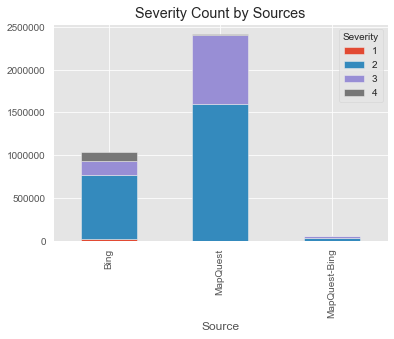

In [4]:
df_source = df.groupby(['Severity','Source']).size().reset_index().pivot(\
    columns='Severity', index='Source', values=0)
df_source.plot(kind='bar', stacked=True, title='Severity Count by Sources')


The stacked bar chart shows that two data providers reported totally different proportions of accidents of each level. _*MapQuest*_ reported so rare accidents with severity level 4 which can not even be seen in the plot, whereas _*Bing*_ reported almost the same number of level 4 accidents as level 3. Meanwhile, _*MapQuest*_ reported much more level 3 accidents than _*Bing*_ in terms of proportion. These differences may be due to the different kinds of accidents they tend to collect or the different definitions of severity level, or the combination of them. If the latter is the case, I don't think we can use the data from both of them at the same time. To check it out, we can examine the distribution of accidents with different severity levels across two main measures, **Impacted Distance** and **Duration.**

In [5]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['End_Time'] = pd.to_datetime(df['End_Time'])
df['Weather_Timestamp'] = pd.to_datetime(df['Weather_Timestamp'])

#calculate duration of accident from end time and start time
df['Duration'] = df.End_Time - df.Start_Time 
df['Duration'] = df['Duration'].apply(lambda x:round(x.total_seconds() / 60) )
print("The overall mean duration is: ", (round(df['Duration'].mean(),3)), 'min')

The overall mean duration is:  115.404 min


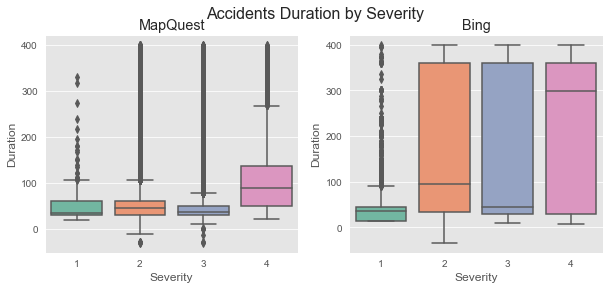

In [6]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 4))
sns.boxplot(x="Severity", y="Duration",
            data=df.loc[(df['Source']=="MapQuest") & (df['Duration']<400),], palette="Set2", ax=axs[0])
axs[0].set_title('MapQuest')
fig.suptitle('Accidents Duration by Severity', fontsize=16)
sns.boxplot(x="Severity", y="Duration",
            data=df.loc[(df['Source']=="Bing") & (df['Duration']<400),], palette="Set2", ax=axs[1])
axs[1].set_title('Bing')
plt.show()

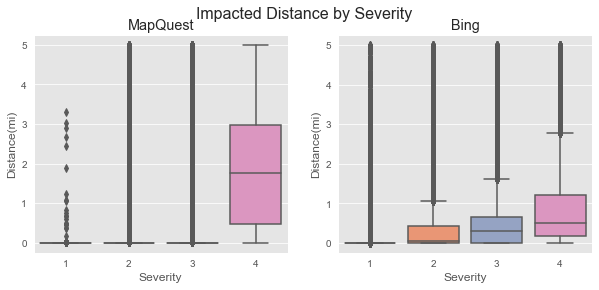

In [7]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 4))
sns.boxplot(x="Severity", y="Distance(mi)", 
            data=df.loc[(df['Source']=="MapQuest") & (df['Distance(mi)']<5),], palette="Set2", ax=axs[0])
axs[0].set_title('MapQuest')
fig.suptitle('Impacted Distance by Severity', fontsize=16)
sns.boxplot(x="Severity", y="Distance(mi)",
            data=df.loc[(df['Source']=="Bing") & (df['Distance(mi)']<5),], palette="Set2", ax=axs[1])
axs[1].set_title('Bing')
plt.show()

Two differences are obvious in the above plots. The first is that the overall duration and impacted distance of accidents reported by _*Bing*_ are much longer than those by _*MapQuest*_. Second, same severity level holds different meanings for  _*MapQuest*_ and _*Bing*_.  _*MapQuest*_ seems to have a clear and strict threshold for severity level 4, cases of which nevertheless only account for a tiny part of the whole dataset.  _*Bing*_ , on the other hand, doesn't seem to have a clear-cut threshold, especially regards duration, but the data is more balanced.

It is hard to choose one and we definitely can't use both. I decided to select  _*MapQuest*_ because serious accidents are we really care about and the sparse data of such accidents is the reality we have to confront.

Finally, drop data reported from _*Bing*_ and **Source** column.

In [8]:
df = df.loc[df['Source']=="MapQuest",]
df = df.drop(['Source'], axis=1)

#### Cleaning the dataset

Features 'ID' doesn't provide any useful information about accidents themselves. 'TMC', 'Distance(mi)', 'End_Time' (we have start time), 'Duration', 'End_Lat', and 'End_Lng'(we have start location) can be collected only after the accident has occured and cant be predictors of accident. For 'Description', the POI features have already been extracted from it by dataset creators.

In [9]:
df = df.drop(['ID','TMC','Description','Distance(mi)', 'End_Time', 
              'End_Lat', 'End_Lng'], axis=1)

Checking some categorical features.

In [10]:
cat_names = ['Side', 'Country', 'Timezone', 'Amenity', 'Bump', 'Crossing', 
             'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 
             'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 
             'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
print("Unique count of categorical features:")
for i in cat_names:
  print(i,df[i].unique().size)

Unique count of categorical features:
Side 3
Country 1
Timezone 5
Amenity 2
Bump 2
Crossing 2
Give_Way 2
Junction 2
No_Exit 2
Railway 2
Roundabout 2
Station 2
Stop 2
Traffic_Calming 2
Traffic_Signal 2
Turning_Loop 1
Sunrise_Sunset 3
Civil_Twilight 3
Nautical_Twilight 3
Astronomical_Twilight 3


Dropping 'Country' and 'Turning_Loop' because they have only one class. Columns 'Civil_Twilight', 'Nautical_Twilight','Astronomical_Twilight' are redundant, we will keep only 'Sunrise_Sunset'.

In [11]:
df = df.drop(['Country','Turning_Loop','Civil_Twilight', 'Nautical_Twilight','Astronomical_Twilight'], axis=1)

#### Clean Up Categorical Features

If we look at categorical features closely, we will find some chaos in 'Wind_Direction' and 'Weather_Condition'. We need to simplify them.

In [12]:
print("Wind Direction: ", df['Wind_Direction'].unique())

Wind Direction:  ['Calm' 'SW' 'SSW' 'WSW' 'WNW' 'NW' 'West' 'NNW' 'NNE' 'South' 'North'
 'Variable' 'SE' 'SSE' 'ESE' 'East' 'NE' 'ENE' 'E' 'W' nan 'S' 'VAR'
 'CALM' 'N']


In [13]:
df.loc[df['Wind_Direction']=='Calm','Wind_Direction'] = 'CALM'
df.loc[(df['Wind_Direction']=='West')|(df['Wind_Direction']=='WSW')|(df['Wind_Direction']=='WNW'),'Wind_Direction'] = 'W'
df.loc[(df['Wind_Direction']=='South')|(df['Wind_Direction']=='SSW')|(df['Wind_Direction']=='SSE'),'Wind_Direction'] = 'S'
df.loc[(df['Wind_Direction']=='North')|(df['Wind_Direction']=='NNW')|(df['Wind_Direction']=='NNE'),'Wind_Direction'] = 'N'
df.loc[(df['Wind_Direction']=='East')|(df['Wind_Direction']=='ESE')|(df['Wind_Direction']=='ENE'),'Wind_Direction'] = 'E'
df.loc[df['Wind_Direction']=='Variable','Wind_Direction'] = 'VAR'
print("Wind Direction after simplification: ", df['Wind_Direction'].unique())

Wind Direction after simplification:  ['CALM' 'SW' 'S' 'W' 'NW' 'N' 'VAR' 'SE' 'E' 'NE' nan]


Weather-related vehicle accidents kill more people annually than large-scale weather disasters(source: weather.com). According to Road Weather Management Program, most weather-related crashes happen on wet-pavement and during rainfall. Winter-condition and fog are another two main reasons for weather-related accidents. To extract these three weather conditions, we first look at what we have in 'Weather_Condition' Feature.

In [14]:
#show distinctive weather conditions 
weather ='!'.join(df['Weather_Condition'].dropna().unique().tolist())
weather = np.unique(np.array(re.split(
    "!|\s/\s|\sand\s|\swith\s|Partly\s|Mostly\s|Blowing\s|Freezing\s", weather))).tolist()
print("Weather Conditions: ", weather)

Weather Conditions:  ['', 'Clear', 'Cloudy', 'Drizzle', 'Dust', 'Dust Whirlwinds', 'Fair', 'Fog', 'Funnel Cloud', 'Hail', 'Haze', 'Heavy ', 'Heavy Drizzle', 'Heavy Ice Pellets', 'Heavy Rain', 'Heavy Rain Showers', 'Heavy Sleet', 'Heavy Smoke', 'Heavy Snow', 'Heavy T-Storm', 'Heavy Thunderstorms', 'Ice Pellets', 'Light ', 'Light Drizzle', 'Light Fog', 'Light Hail', 'Light Haze', 'Light Ice Pellets', 'Light Rain', 'Light Rain Shower', 'Light Rain Showers', 'Light Sleet', 'Light Snow', 'Light Snow Grains', 'Light Snow Shower', 'Light Snow Showers', 'Light Thunderstorm', 'Light Thunderstorms', 'Low Drifting Snow', 'Mist', 'N/A Precipitation', 'Overcast', 'Partial Fog', 'Patches of Fog', 'Rain', 'Rain Shower', 'Rain Showers', 'Sand', 'Scattered Clouds', 'Shallow Fog', 'Showers in the Vicinity', 'Sleet', 'Small Hail', 'Smoke', 'Snow', 'Snow Grains', 'Snow Showers', 'Squalls', 'T-Storm', 'Thunder', 'Thunder in the Vicinity', 'Thunderstorm', 'Thunderstorms', 'Tornado', 'Volcanic Ash', 'Widespr

Creating features for some common weather conditions and drop 'Weather_Condition'.

In [15]:
df['Clear'] = np.where(df['Weather_Condition'].str.contains('Clear', case=False, na = False), 1, 0)
df['Cloud'] = np.where(df['Weather_Condition'].str.contains('Cloud|Overcast', case=False, na = False), 1, 0)
df['Rain'] = np.where(df['Weather_Condition'].str.contains('Rain|storm', case=False, na = False), 1, 0)
df['Heavy_Rain'] = np.where(df['Weather_Condition'].str.contains('Heavy Rain|Rain Shower|Heavy T-Storm|Heavy Thunderstorms', case=False, na = False), 1, 0)
df['Snow'] = np.where(df['Weather_Condition'].str.contains('Snow|Sleet|Ice', case=False, na = False), 1, 0)
df['Heavy_Snow'] = np.where(df['Weather_Condition'].str.contains('Heavy Snow|Heavy Sleet|Heavy Ice Pellets|Snow Showers|Squalls', case=False, na = False), 1, 0)
df['Fog'] = np.where(df['Weather_Condition'].str.contains('Fog', case=False, na = False), 1, 0)

#Assign NA to created weather features where 'Weather_Condition' is null.
weather = ['Clear','Cloud','Rain','Heavy_Rain','Snow','Heavy_Snow','Fog']
for i in weather:
  df.loc[df['Weather_Condition'].isnull(),i] = df.loc[df['Weather_Condition'].isnull(),'Weather_Condition']

df.loc[:,['Weather_Condition'] + weather]

df = df.drop(['Weather_Condition'], axis=1)

#### Fixing Datetime Format

In [16]:
#average difference between weather time and start time
print("Mean difference between 'Start_Time' and 'Weather_Timestamp': ", 
(df.Weather_Timestamp - df.Start_Time).mean())

Mean difference between 'Start_Time' and 'Weather_Timestamp':  0 days 00:00:30.397947


Since the 'Weather_Timestamp' is almost as same as 'Start_Time', we can just keep 'Start_Time'. Then map 'Start_Time' to 'Year', 'Month', 'Weekday', 'Day' (in a year), 'Hour', and 'Minute' (in a day).

In [17]:
df = df.drop(["Weather_Timestamp"], axis=1)

df['Year'] = df['Start_Time'].dt.year

nmonth = df['Start_Time'].dt.month
df['Month'] = nmonth

df['Weekday']= df['Start_Time'].dt.weekday

days_each_month = np.cumsum(np.array([0,31,28,31,30,31,30,31,31,30,31,30,31]))
nday = [days_each_month[arg-1] for arg in nmonth.values]
nday = nday + df["Start_Time"].dt.day.values
df['Day'] = nday

df['Hour'] = df['Start_Time'].dt.hour

df['Minute']=df['Hour']*60.0+df["Start_Time"].dt.minute

df.loc[:4,['Start_Time', 'Year', 'Month', 'Weekday', 'Day', 'Hour', 'Minute']]

,Start_Time,Year,Month,Weekday,Day,Hour,Minute
0,2016-02-08 05:46:00,2016,2,0,39,5,346.0
1,2016-02-08 06:07:59,2016,2,0,39,6,367.0
2,2016-02-08 06:49:27,2016,2,0,39,6,409.0
3,2016-02-08 07:23:34,2016,2,0,39,7,443.0
4,2016-02-08 07:39:07,2016,2,0,39,7,459.0


#### Handling missing data

In [18]:
missing = pd.DataFrame(df.isnull().sum()).reset_index()
missing.columns = ['Feature', 'Missing_Percent(%)']
missing['Missing_Percent(%)'] = missing['Missing_Percent(%)'].apply(lambda x: x / df.shape[0] * 100)
missing.loc[missing['Missing_Percent(%)']>0,:]

,Feature,Missing_Percent(%)
4,Number,59.879195
7,City,0.002071
10,Zipcode,0.012840
11,Timezone,0.085366
12,Airport_Code,0.170857
13,Temperature(F),1.634138
14,Wind_Chill(F),58.718072
15,Humidity(%),1.742119
16,Pressure(in),1.404009
17,Visibility(mi),1.969680


More than 60% percent of 'Number', 'Wind_Chill(F)', and 'Precipitation(in)' is missing. Drop na and value imputation wouldn't work for these features. 'Number' and 'Wind_Chill(F)' will be dropped because they are not highly related to severity according to previous research, whereas 'Precipitation(in)' could be a useful predictor and hence can be handled by separating feature.

In [19]:
df = df.drop(['Number','Wind_Chill(F)'], axis=1)

Adding a new feature for missing values in 'Precipitation(in)' and replace missing values with median.

In [20]:
df['Precipitation_NA'] = 0
df.loc[df['Precipitation(in)'].isnull(),'Precipitation_NA'] = 1
df['Precipitation(in)'] = df['Precipitation(in)'].fillna(df['Precipitation(in)'].median())
df.loc[:5,['Precipitation(in)','Precipitation_NA']]

,Precipitation(in),Precipitation_NA
0,0.02,0
1,0.00,0
2,0.00,1
3,0.00,1
4,0.00,1
5,0.03,0


#### Dropping NaN values


The counts of missing values in some features are much smaller compared to the total sample. It is convenient to drop rows with missing values in these columns.

Dropping NAs in following features:

- 'City'
- 'Zipcode'
- 'Airport_Code'
- 'Sunrise_Sunset'

In [21]:
df = df.dropna(subset=['City','Zipcode','Airport_Code',
                       'Sunrise_Sunset'])

#### Value Imputation
Most of the rest columns only have small missing part that can be filled or dropped.

Continuous weather features with missing values:

- Temperature(F)

- Humidity(%)

- Pressure(in)

- Visibility(mi)

- Wind_Speed(mph)


Before imputation, weather features will be grouped by location and time first, to which weather is naturally related. 'Airport_Code' is selected as location feature because the sources of weather data are airport-based weather stations. Then the data will be grouped by 'Start_Month' rather than 'Start_Hour' because using the former is computationally cheaper and remains less missing values. Finally, missing values will be replaced by median value of each group.

In [22]:
#group data by 'Airport_Code' and 'Start_Month' then fill NAs with median value
Weather_data=['Temperature(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)']
print("The number of remaining missing values: ")
for i in Weather_data:
  df[i] = df.groupby(['Airport_Code','Month'])[i].apply(lambda x: x.fillna(x.median()))
  print( i + " : " + df[i].isnull().sum().astype(str))

The number of remaining missing values: 
Temperature(F) : 4899
Humidity(%) : 4924
Pressure(in) : 4865
Visibility(mi) : 11084
Wind_Speed(mph) : 11257


Dropping remaining missing values

In [23]:
df = df.dropna(subset=Weather_data)

For categorical weather features, mode will be used rather than median to replace missing values.

In [24]:
#group data by 'Airport_Code' and 'Start_Month' then fill NAs with majority value
from collections import Counter
weather_cat = ['Wind_Direction'] + weather
print("Count of missing values that will be dropped: ")
for i in weather_cat:
  df[i] = df.groupby(['Airport_Code','Month'])[i].apply(lambda x: x.fillna(Counter(x).most_common()[0][0]) if all(x.isnull())==False else x)
  print(i + " : " + df[i].isnull().sum().astype(str))

#drop na
df = df.dropna(subset=weather_cat)

Count of missing values that will be dropped: 
Wind_Direction : 7999
Clear : 10507
Cloud : 11276
Rain : 9490
Heavy_Rain : 8939
Snow : 8963
Heavy_Snow : 8932
Fog : 8955


In [25]:
df.isnull().sum(axis = 0)

Severity             0
Start_Time           0
Start_Lat            0
Start_Lng            0
Street               0
Side                 0
City                 0
County               0
State                0
Zipcode              0
Timezone             0
Airport_Code         0
Temperature(F)       0
Humidity(%)          0
Pressure(in)         0
Visibility(mi)       0
Wind_Direction       0
Wind_Speed(mph)      0
Precipitation(in)    0
Amenity              0
Bump                 0
Crossing             0
Give_Way             0
Junction             0
No_Exit              0
Railway              0
Roundabout           0
Station              0
Stop                 0
Traffic_Calming      0
Traffic_Signal       0
Sunrise_Sunset       0
Duration             0
Clear                0
Cloud                0
Rain                 0
Heavy_Rain           0
Snow                 0
Heavy_Snow           0
Fog                  0
Year                 0
Month                0
Weekday              0
Day        

In [26]:
df.to_hdf(r'C:\Users\ANUSHA\Downloads\US_Accidents_fulldf.csv',key='df', mode='w')

C:\Users\ANUSHA\Anaconda3\lib\site-packages\pandas\core\generic.py:2530: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block4_values] [items->['Street', 'Side', 'City', 'County', 'State', 'Zipcode', 'Timezone', 'Airport_Code', 'Wind_Direction', 'Sunrise_Sunset', 'Clear', 'Cloud', 'Rain', 'Heavy_Rain', 'Snow', 'Heavy_Snow', 'Fog']]

  pytables.to_hdf(path_or_buf, key, self, **kwargs)


## Exploratory Data Analysis<a name="eda"></a>

In [27]:
print('This dataset contains data beween {} and {}.'.format(df.Start_Time.min(),df.Start_Time.max()))

This dataset contains data beween 2016-02-08 05:46:00 and 2020-06-30 23:18:09.


In [28]:
allday_lst=df.Start_Time.astype(str).str.split(' ')
allday_lst2=[item[0] for item in allday_lst]

print('There are {} total accidents from 2016-2020'.format(df.shape[0]))
print('On average, there are {} accidents per day.'.format(round(df.shape[0]/len(set(allday_lst2)))))
df.reset_index(inplace=True)

There are 2384350 total accidents from 2016-2020
On average, there are 1506 accidents per day.


#### Count of Accidents by State

Text(0.5, 1.0, 'Road Accidents in USA from 2016 to 2020')

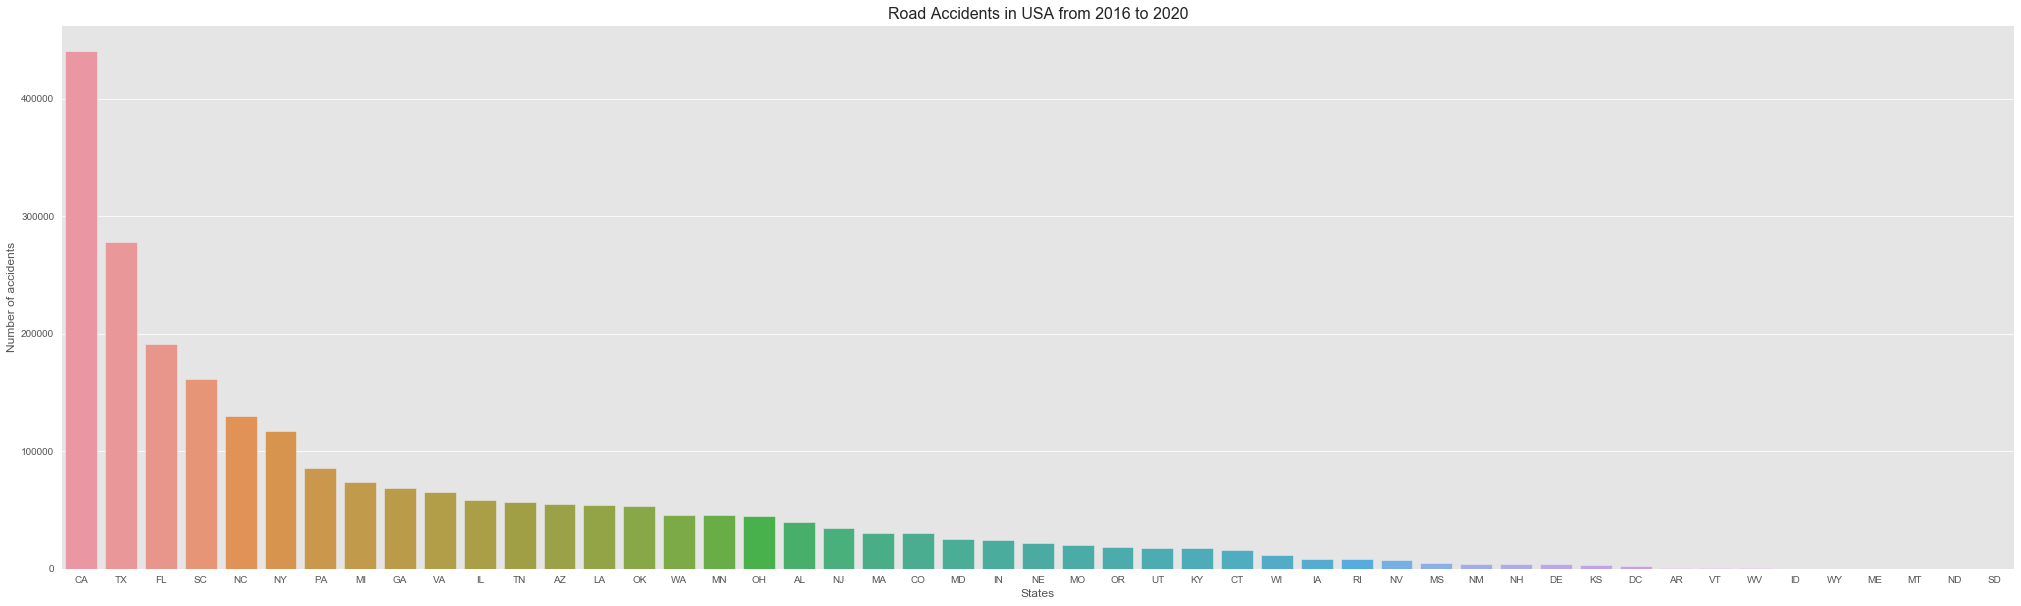

In [29]:
plt.figure(figsize=(35,10))
sns.countplot(x='State', data=df, order=df['State'].value_counts().index)
plt.xlabel('States')
plt.ylabel('Number of accidents')
plt.title('Road Accidents in USA from 2016 to 2020', fontsize = 16)

We see that CA, TX and FL are the top 3 states with the hight number of accidents recorded from 2016-2020.

In [30]:
df.Severity.value_counts()

2    1577624
3     799076
4       6615
1       1035
Name: Severity, dtype: int64

As seen from above, the data is so unbalanced that we can hardly do exploratory analysis. To address this issue, the combination of over- and under-sampling will be used since the dataset is large enough. level 4 will be randomly oversampled to 100000 and other levels will be randomly undersampled to 100000.

In [31]:
df['Severity4'] = 0
df.loc[df['Severity'] == 4, 'Severity4'] = 1
df = df.drop(['Severity'], axis = 1)
df_bl = pd.concat([df[df['Severity4']==1].sample(100000, replace = True),
                   df[df['Severity4']==0].sample(100000)], axis=0)
print('resampled data:', df_bl.Severity4.value_counts())

resampled data: 1    100000
0    100000
Name: Severity4, dtype: int64


Visualising the points with most severe accidents on the map of USA.

C:\Users\ANUSHA\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


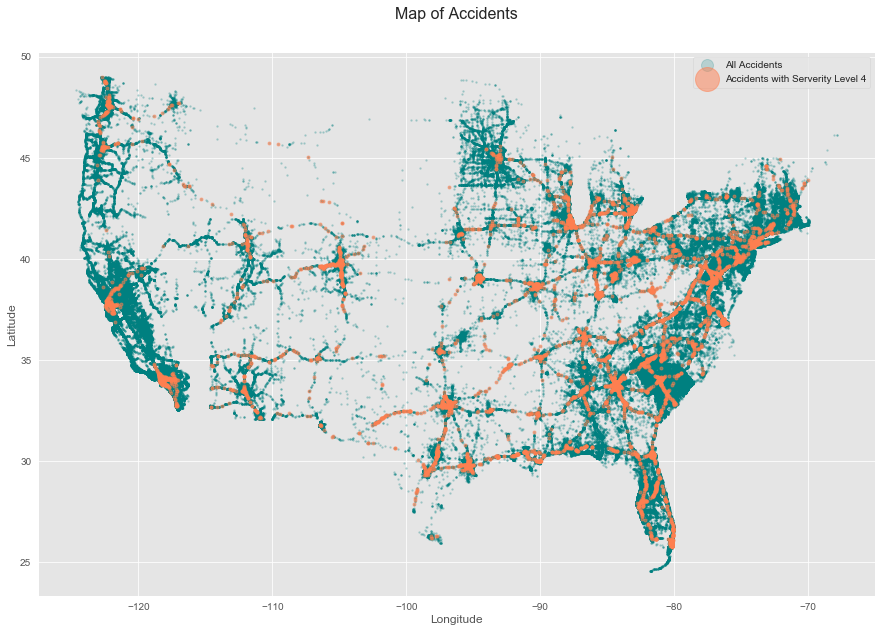

In [32]:
df_4 = df[df['Severity4']==1]

plt.figure(figsize=(15,10))

plt.plot( 'Start_Lng', 'Start_Lat', data=df, linestyle='', marker='o', markersize=1.5, color="teal", alpha=0.2, label='All Accidents')
plt.plot( 'Start_Lng', 'Start_Lat', data=df_4, linestyle='', marker='o', markersize=3, color="coral", alpha=0.5, label='Accidents with Serverity Level 4')
plt.legend(markerscale=8)
plt.xlabel('Longitude', size=12, labelpad=3)
plt.ylabel('Latitude', size=12, labelpad=3)
plt.title('Map of Accidents', size=16, y=1.05)
plt.show()

Now we can do some exploratory analysis on resampled data.

#### Accident count: by Timezone

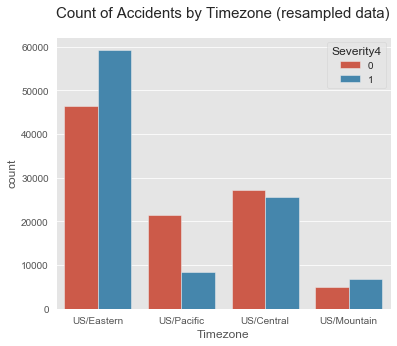

In [33]:
plt.figure(figsize=(6,5))
chart = sns.countplot(x='Timezone', hue='Severity4', data=df_bl)
plt.title("Count of Accidents by Timezone (resampled data)", size=15, y=1.05)
plt.show()

#### Count of Severity 4 accidents in each state

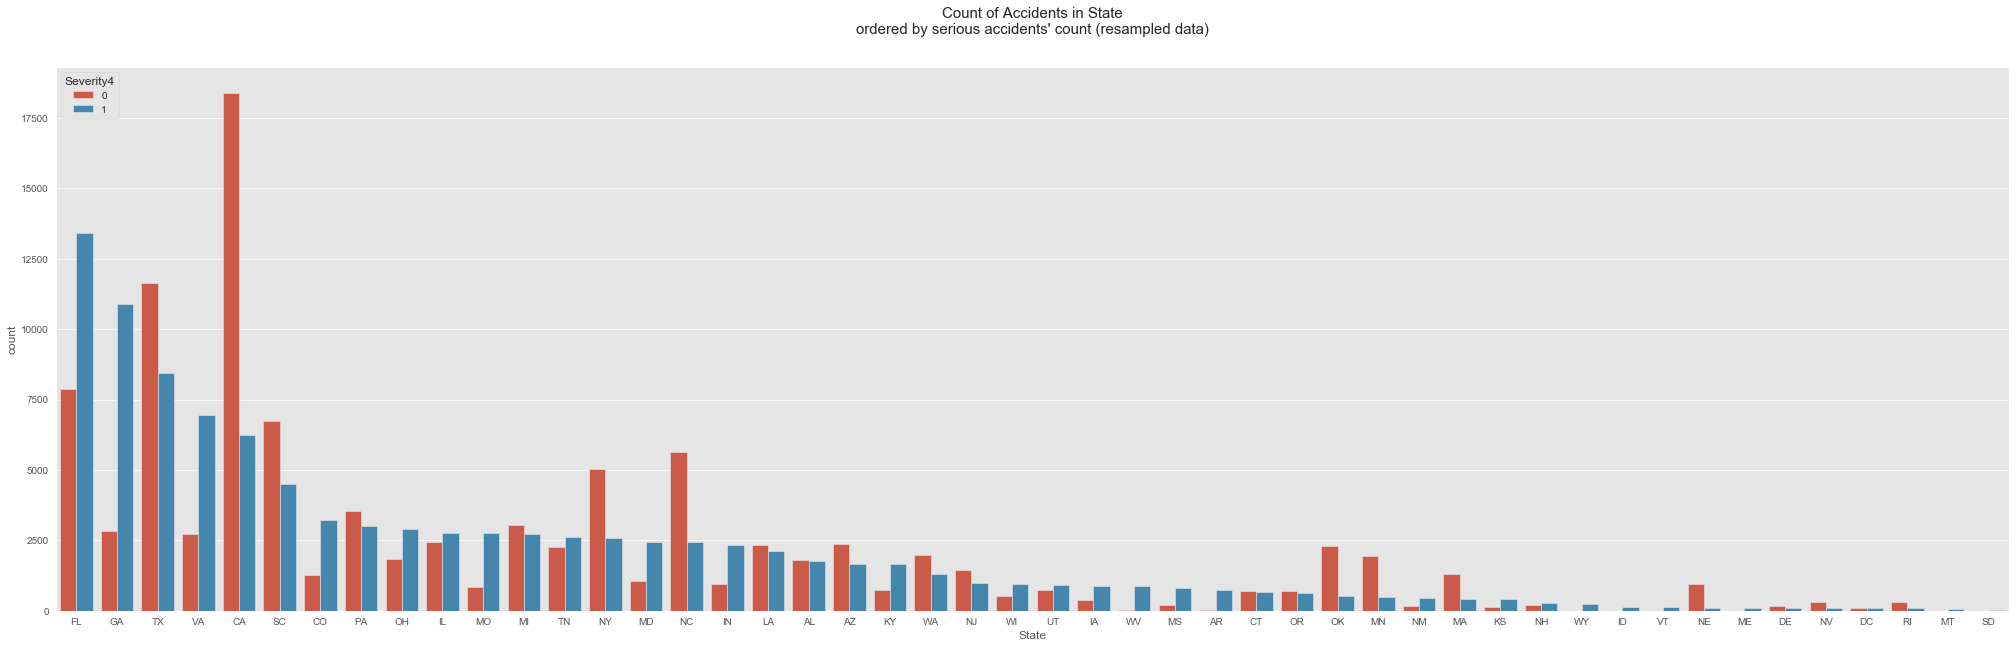

In [34]:
plt.figure(figsize=(35,10))
chart = sns.countplot(x='State', hue='Severity4', data=df_bl, order=df_bl[df_bl['Severity4']==1]['State'].value_counts().index )
plt.title("Count of Accidents in State\nordered by serious accidents' count (resampled data)", size=15, y=1.05)
plt.show()

We see that FL, GA and TX are the 3 states with most 'severe' accidents. Hence we shall find the factors that could influence such accidents.

In [35]:
state_lst=['FL','GA','TX']
state_lst_full=['Florida','Georgia','Texas']

Selecting the 3 states for further analysis

In [36]:
df_state = df_bl[df_bl.State.isin(state_lst)] 
df_state.head()

,index,Start_Time,Start_Lat,Start_Lng,Street,Side,City,County,State,Zipcode,Timezone,Airport_Code,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Duration,Clear,Cloud,Rain,Heavy_Rain,Snow,Heavy_Snow,Fog,Year,Month,Weekday,Day,Hour,Minute,Precipitation_NA,Severity4
1077425,1135139,2019-06-24 20:59:17,30.460022,-81.678223,W Beltway N,R,Jacksonville,Duval,FL,32218,US/Eastern,KJAX,86.0,59.0,29.92,10.0,SW,8.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,Night,58,0,0,0,0,0,0,0,2019,6,0,175,20,1259.0,0,1
937789,991423,2019-08-21 13:53:08,33.760464,-84.493477,GA-407 S,R,Atlanta,Fulton,GA,30331,US/Eastern,KFTY,90.0,46.0,29.21,10.0,SW,7.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,Day,59,0,1,0,0,0,0,0,2019,8,2,233,13,833.0,0,1
961478,1016057,2019-07-03 11:32:55,33.072926,-97.020988,I-35E S,R,Lewisville,Denton,TX,75077,US/Central,KDTO,83.0,67.0,29.27,10.0,S,14.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,Day,48,0,1,0,0,0,0,0,2019,7,2,184,11,692.0,0,1
716430,753016,2019-12-01 04:02:48,25.847078,-80.207848,I-95 S,R,Miami,Miami-Dade,FL,33150,US/Eastern,KOPF,65.0,93.0,29.98,10.0,CALM,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,True,Night,63,0,0,0,0,0,0,0,2019,12,6,335,4,242.0,0,1
606982,632685,2020-04-27 16:05:35,25.942879,-80.187675,I-95 N,R,Miami,Miami-Dade,FL,33179,US/Eastern,KHWO,84.0,40.0,30.07,10.0,E,13.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,Day,59,0,0,0,0,0,0,0,2020,4,0,117,16,965.0,0,1


#### Accident count: by Year

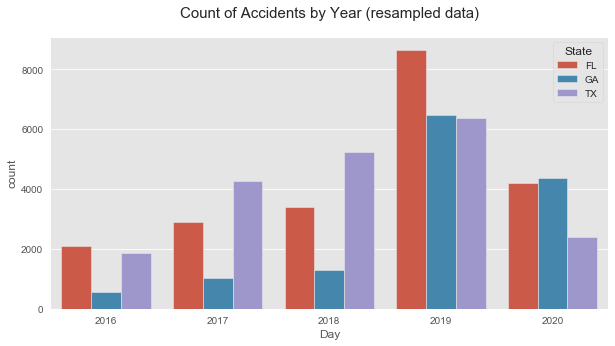

In [37]:
plt.figure(figsize=(10,5))
chart = sns.countplot(x='Year', hue='State', data=df_state)
plt.xlabel('Day')
plt.title('Count of Accidents by Year (resampled data)', size=15, y=1.05)
plt.show()

The above plot shows the number of accidents by year. The number of accidents is increasing by the year and there is not enough data for 2020 and I would guess the accidents may decrease by the end of 2020 because of current lockdown. But we also see that there is a huge amount of increase in 2019 in GA and FL.

#### Accident count: by Month

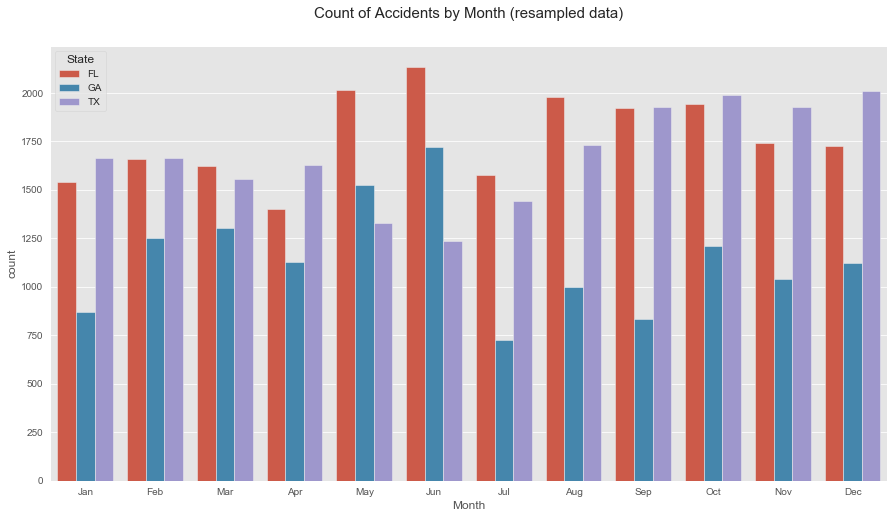

In [38]:
month_lst = [ 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug','Sep','Oct','Nov','Dec']
plt.figure(figsize=(15,8))
chart = sns.countplot(x='Month', hue='State', data=df_state )
plt.xlabel('Month')
plt.title('Count of Accidents by Month (resampled data)', size=15, y=1.05)
chart.set(xticks=range(len(month_lst)), xticklabels=[i for i in month_lst])
plt.show()

This shows the bar plot of accidents by month. 
* GA - The number of accidents keeps fluctuating. Increase in summer months.
* FL - Almost uniform till April with an increase in May then sudden decrease in July and again increasing in August.
* TX - Almost uniform till April followed by a steady increase from May till October,

#### Accident count: by Day

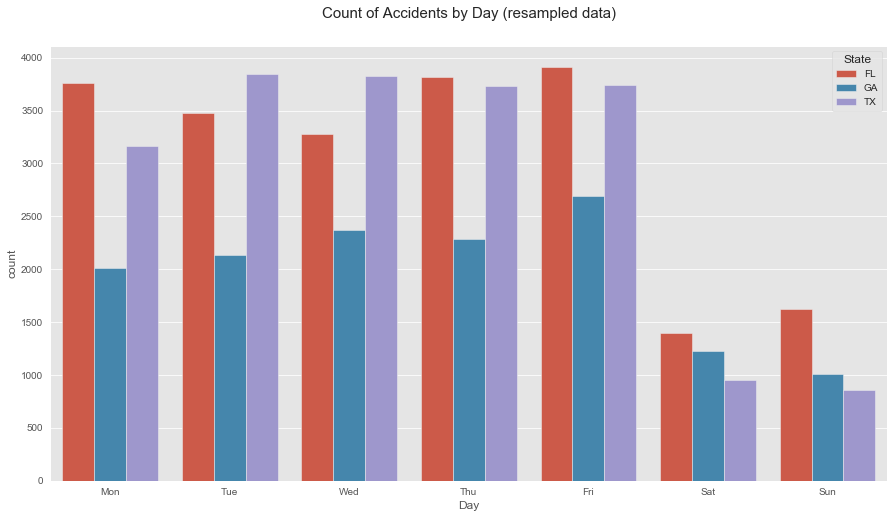

In [39]:
day_lst = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.figure(figsize=(15,8))
chart = sns.countplot(x='Weekday', hue='State', data=df_state )
plt.xlabel('Day')
plt.title('Count of Accidents by Day (resampled data)', size=15, y=1.05)
chart.set(xticks=range(len(day_lst)), xticklabels=[i for i in day_lst])
plt.show()

This shows the bar plot of accidents by Day.
* GA - a little peak is seen on Friday.
* FL - a dip on Wednesday otherwise almost uniform
* TX - Monday has lesser accidents than other weekdays

Accidents are signicantly less on weekends.

#### Accident count: by Hour

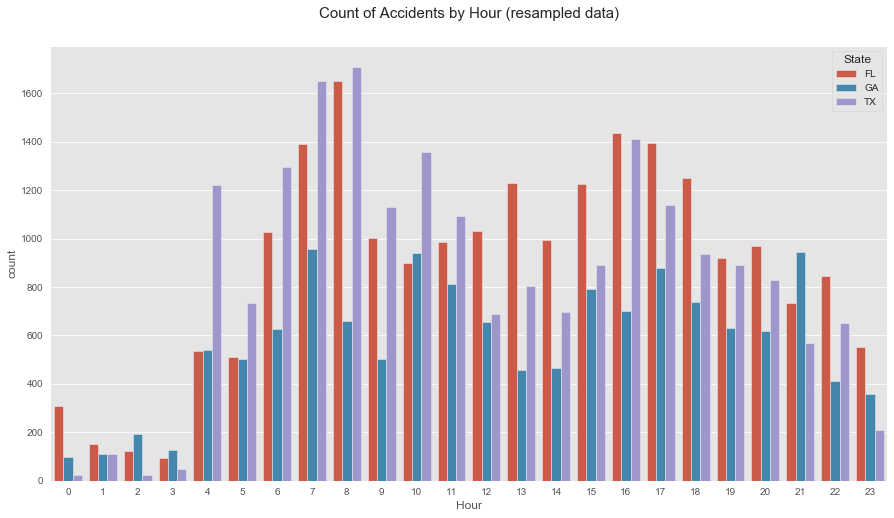

In [40]:
hour_lst = np.arange(24)
plt.figure(figsize=(15,8))
chart = sns.countplot(x='Hour', hue='State', data=df_state )
plt.xlabel('Hour')
plt.title('Count of Accidents by Hour (resampled data)', size=15, y=1.05)
chart.set(xticks=range(len(hour_lst)), xticklabels=[i for i in hour_lst])
plt.show()

This shows the bar plot of accidents by Hour. Most of the severe accidents tend to happen during morning office hours or later in the evening. These are peak traffic periods as many people travel to offices and back to home.

#### Period of day most accidents occurred

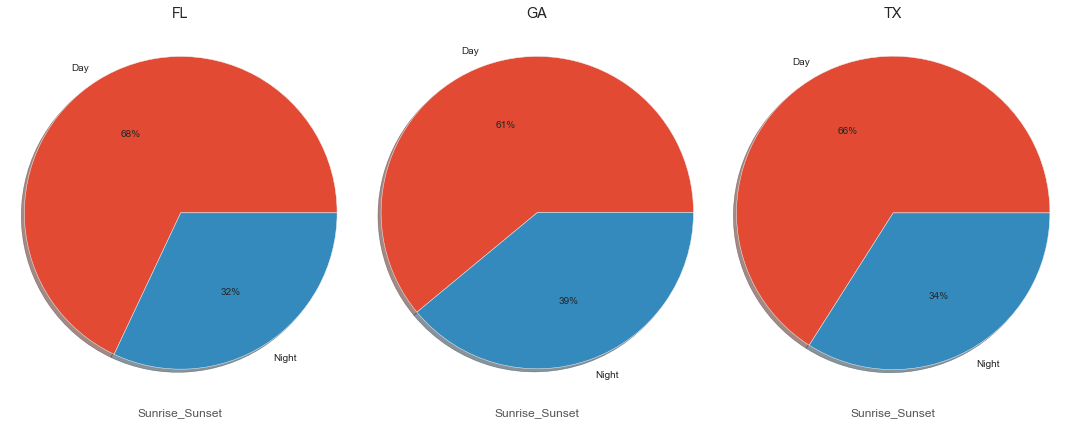

In [41]:
feature='Sunrise_Sunset'

fig= plt.figure(figsize=(15,6))

#Cutoff percentage for display
pct_cutoff=2

#Define autopct: only display the value if the percentage is greater than the predefined cutoff value
def my_autopct(pct):
    return ('%1.0f%%' % pct) if pct > pct_cutoff else ''


#Run a for loop for each state
for i,state in enumerate(state_lst):
    plt.subplot(1, 3, 1+i)
    #Slice the dataframe for the specific state and feature
    df_temp=df_state[df_state['State']==state][feature].value_counts(normalize=True).round(2)
    #Define lables to go with the pie plot
    labels = [n if v > pct_cutoff/100 else ''
              for n, v in zip(df_temp.index, df_temp)] 
    #making the plot
    plt.pie(df_temp, labels=labels, autopct=my_autopct, shadow=True)
    plt.axis('equal')
    plt.xlabel(feature)
    plt.title(state)
    
plt.tight_layout()
plt.show()

Over 60% accidents happened before sunset.

#### Which side of  the road did the accidents occur?

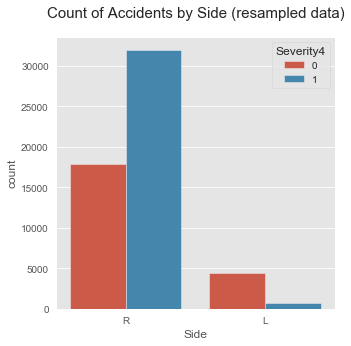

In [42]:
plt.figure(figsize=(5,5))
chart = sns.countplot(x='Side', hue='Severity4', data=df_state)
plt.title("Count of Accidents by Side (resampled data)", size=15, y=1.05)
plt.show()

 The above plot shows the accidents on right and left sides of the lane. Most of the severe accidents happened on the right side of the lane as shown in blue.

#### POI features near accident site

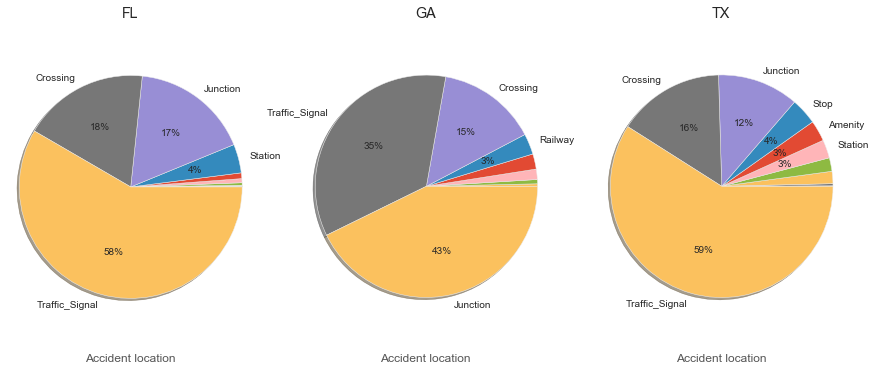

In [43]:
feature='Accident location'

#Set the state as the index
df_state.set_index('State',drop=True,inplace=True)

#State is the index when selecting bool type data as df_bool
df_bool=df_state.select_dtypes(include=['bool'])

#Reset the index of the original data for other calculations
df_state.reset_index(inplace=True)

fig= plt.figure(figsize=(15,6))

pct_cutoff=2.5
def my_autopct(pct):
    return ('%1.0f%%' % pct) if pct > pct_cutoff else ''

for i,state in enumerate(state_lst):
    plt.subplot(1, 3, 1+i)
    df_temp=df_bool[df_bool.index==state]
    df_temp=(df_temp.sum(axis=0)/df_temp.sum(axis=0).sum()).sort_values()
    labels = [n if v > pct_cutoff/100 else ''
              for n, v in zip(df_temp.index, df_temp)] 
    plt.pie(df_temp, labels=labels, autopct=my_autopct, shadow=True)
    plt.axis('equal')
    plt.xlabel(feature)
    plt.title(state)

plt.xlabel(feature)
plt.show()


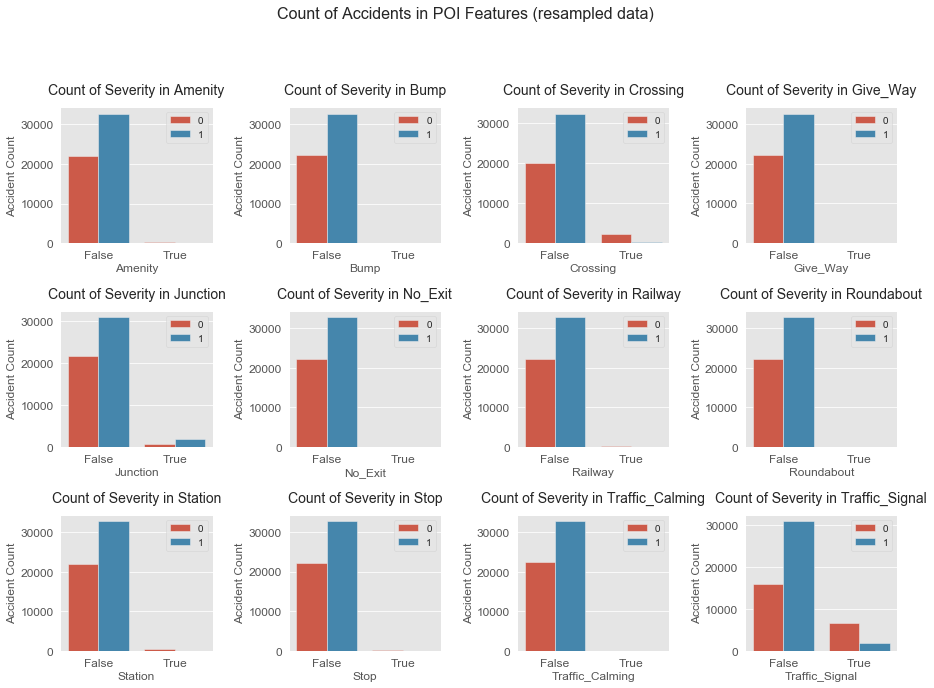

In [44]:
POI_features = ['Amenity','Bump','Crossing','Give_Way','Junction','No_Exit',
                'Railway','Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal']

fig, axs = plt.subplots(ncols=3, nrows=4, figsize=(15, 10))
plt.subplots_adjust(hspace=0.5,wspace = 0.5)

for i, feature in enumerate(POI_features, 1):    
    plt.subplot(3, 4, i)
    sns.countplot(x=feature, hue='Severity4', data=df_state)
    
    plt.xlabel('{}'.format(feature), size=12, labelpad=3)
    plt.ylabel('Accident Count', size=12, labelpad=3)    
    plt.tick_params(axis='x', labelsize=12)
    plt.tick_params(axis='y', labelsize=12)
    
    plt.legend(['0', '1'], loc='upper right', prop={'size': 10})
    plt.title('Count of Severity in {}'.format(feature), size=14, y=1.05)
fig.suptitle('Count of Accidents in POI Features (resampled data)',y=1.02, fontsize=16)
plt.show()

Accidents near traffic signal and crossing are much less likely to be serious. Accidents near the junction are more likely to be serious. Maybe it is because people usually slow down in front of crossing and traffic signal but junction and severity are highly related to speed. Other POI features are so unbalanced that it is hard to tell their relation with severity from plots.

Drop some features:

- 'Bump'
- 'Give_Way'
- 'No_Exit'
- 'Roundabout'
- 'Traffic_Calming'

In [45]:
df= df.drop(['Bump','Give_Way','No_Exit','Roundabout','Traffic_Calming'], axis=1)

####  In what weather condition do most accidents happen?

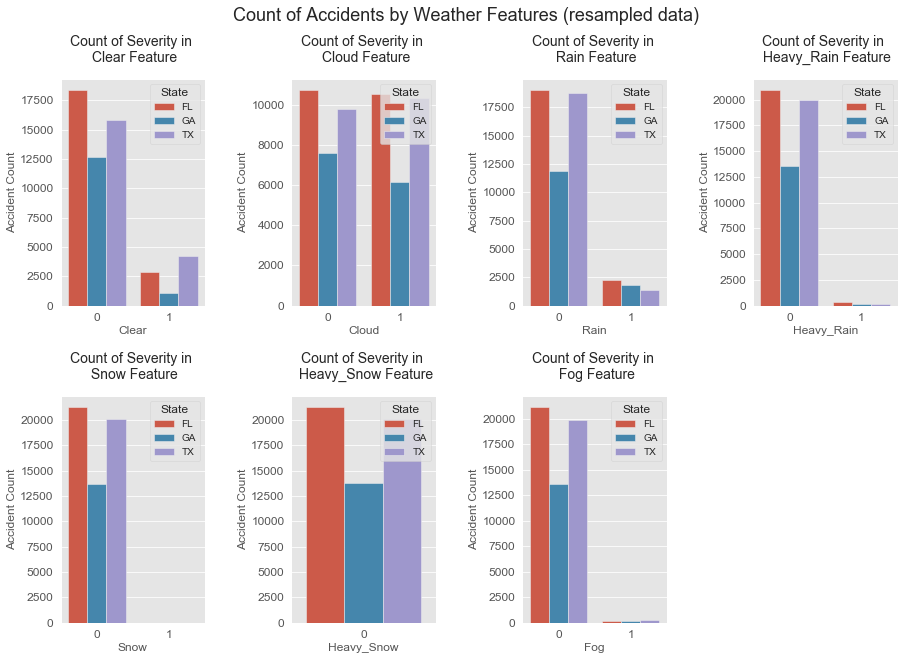

In [46]:
fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(15, 10))
plt.subplots_adjust(hspace=0.4,wspace = 0.6)
for i, feature in enumerate(weather, 1):    
    plt.subplot(2, 4, i)
    sns.countplot(x=feature, hue='State', data=df_state)
    
    plt.xlabel('{}'.format(feature), size=12, labelpad=3)
    plt.ylabel('Accident Count', size=12, labelpad=3)    
    plt.tick_params(axis='x', labelsize=12)
    plt.tick_params(axis='y', labelsize=12)
    plt.title('Count of Severity in \n {} Feature'.format(feature), size=14, y=1.05)
fig.suptitle('Count of Accidents by Weather Features (resampled data)', fontsize=18)
plt.show()

The above plots show the count of accidents in certain weather conditions. Most accidents occurred when the weather wasn't clear. The presence of clouds don't seem to affect count of accidents. We'd expect a high count of accidents in the presence of rain, snow or fog, but interestingly that is not the case here.

#### Count of Accidents as per Wind Direction

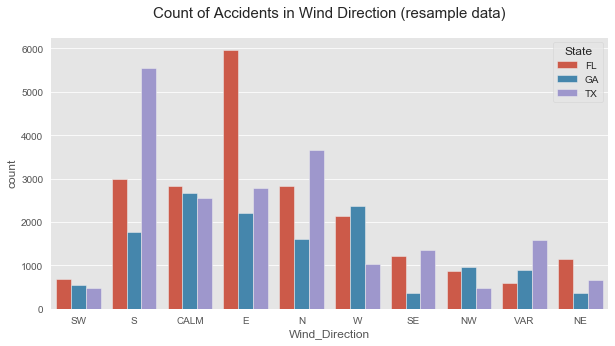

In [47]:
plt.figure(figsize=(10,5))
chart = sns.countplot(x='Wind_Direction', hue='State', data=df_state)
plt.title("Count of Accidents in Wind Direction (resample data)", size=15, y=1.05)
plt.show()

TX and FL have a steep peak in accidents when the wind blows from South and East, respectively.

#### Density plot for other Weather Attributes

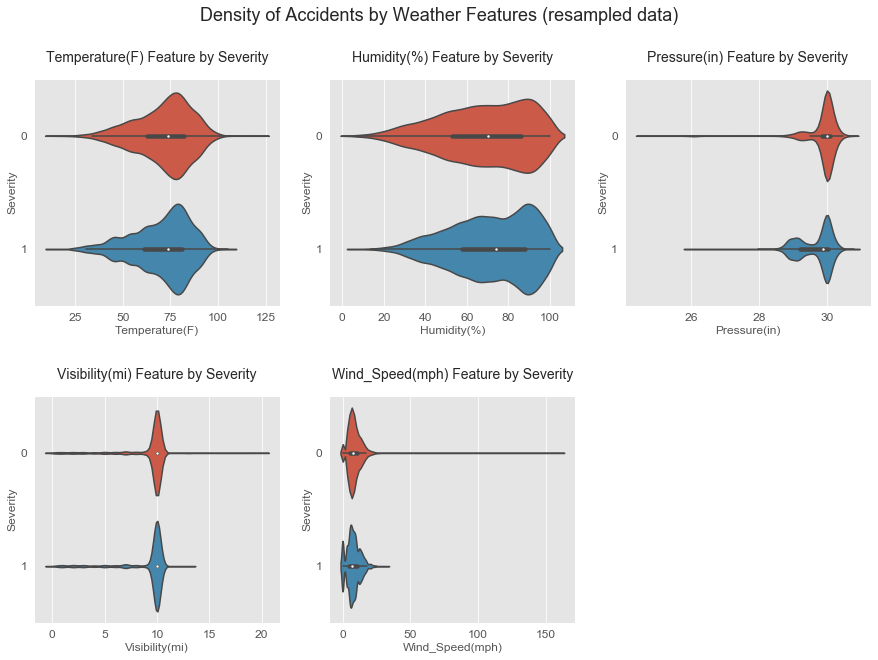

In [48]:
df_bl = pd.concat([df[df['Severity4']==1].sample(40000, replace = True), 
                   df[df['Severity4']==0].sample(40000)], axis=0) #normalising skewed distribution

df_bl['Severity4'] = df_bl['Severity4'].astype('category')
df_state = df_bl[df_bl.State.isin(state_lst)]
features = ['Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)']
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(15, 10))
plt.subplots_adjust(hspace=0.4,wspace = 0.2)
for i, feature in enumerate(features, 1):    
    plt.subplot(2, 3, i)
    sns.violinplot(x=feature, y="Severity4", data=df_state)
    
    plt.xlabel('{}'.format(feature), size=12, labelpad=3)
    plt.ylabel('Severity', size=12, labelpad=3)    
    plt.tick_params(axis='x', labelsize=12)
    plt.tick_params(axis='y', labelsize=12)

    plt.title('{} Feature by Severity'.format(feature), size=14, y=1.05)
fig.suptitle('Density of Accidents by Weather Features (resampled data)', fontsize=18)
plt.show()

With increasing temperature and humidity, the accidents increase. This agrees with our previous observation of increase in accidents in the summer months. Statistics of visibility show that most of the values of visibility are around 10 miles.

## Impact of COVID-19 on accidents

We will compare records of accidents from March 2020(when lockdown was imposed in most states of USA) 
till June 2020 with 2019 records to see difference in numbers and trends.

In [49]:
year = [2019,2020]
df = df[df.Year.isin(year)]
comparison = df[df.Year.isin(year) & (df.Month >= 3) & (df.Month <= 6)]

Text(0.5, 1.0, 'Road Accidents in USA during COVID-19 Lockdown')

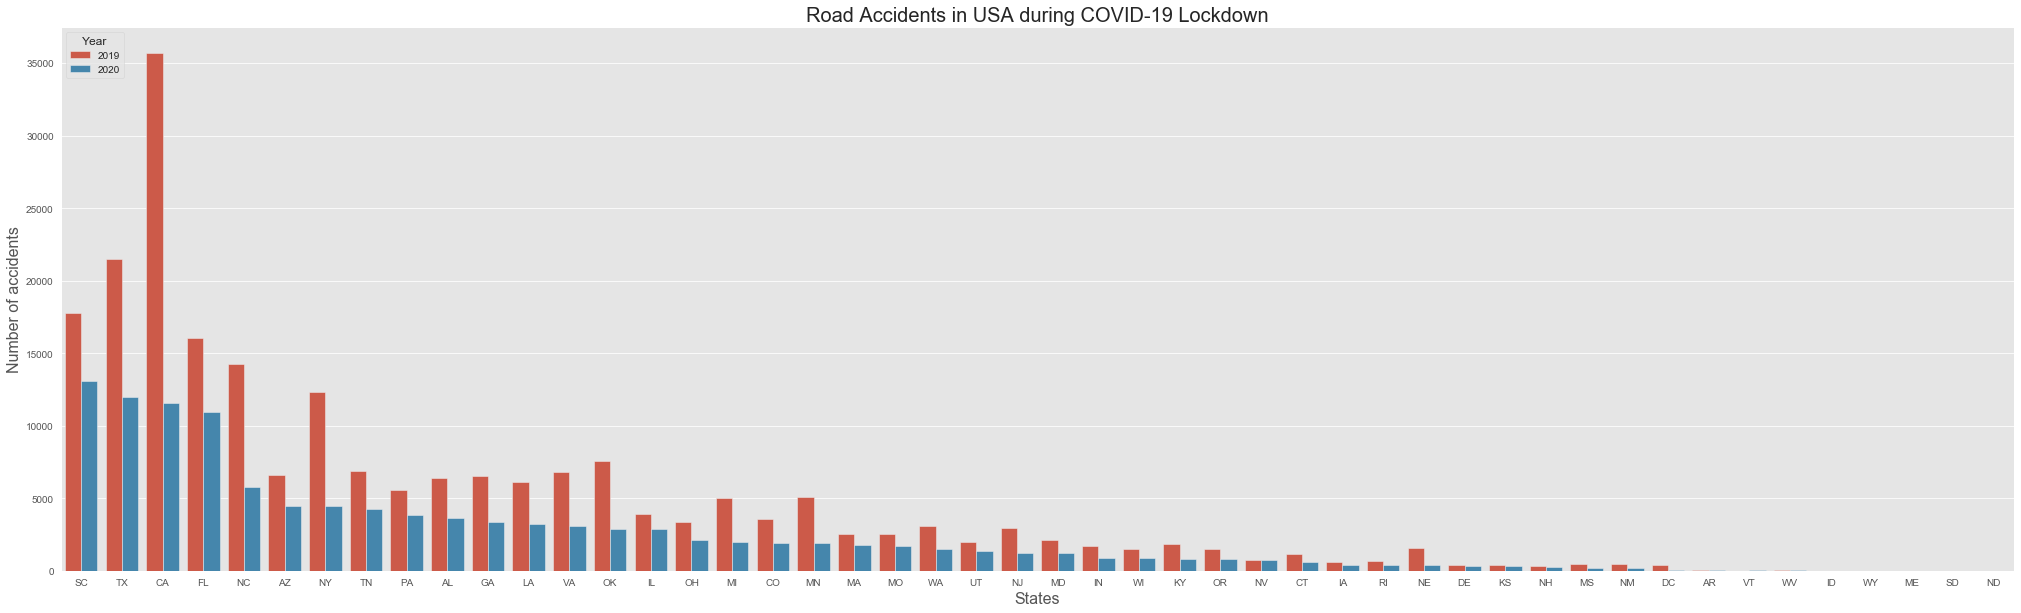

In [50]:
plt.figure(figsize=(35,10))
sns.countplot(x='State', data=comparison, hue = 'Year',order=comparison[comparison['Year']==2020]['State'].value_counts().index)
sns.set_style("whitegrid")
plt.xlabel('States',fontsize = 16)
plt.ylabel('Number of accidents',fontsize = 16)
plt.title('Road Accidents in USA during COVID-19 Lockdown', fontsize = 20)

WE see that SC, TX and CA have taken a lead in the pandemic. But CA and TX have gone down in numbers very significantly.

#### Accident count: by Month

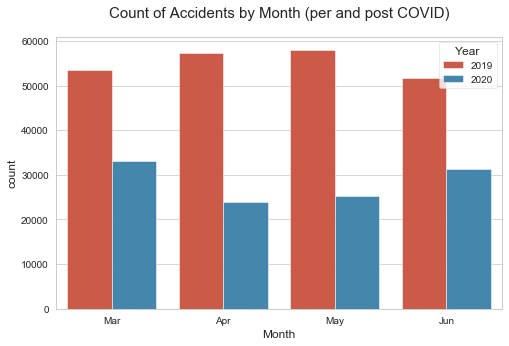

In [51]:
month_lst = ['Mar', 'Apr', 'May', 'Jun']
plt.figure(figsize=(8,5))
chart = sns.countplot(x='Month', hue='Year', data=comparison )
plt.xlabel('Month')
plt.title('Count of Accidents by Month (per and post COVID)', size=15, y=1.05)
chart.set(xticks=range(len(month_lst)), xticklabels=[i for i in month_lst])
plt.show()

As expected, post lockdown, the numbers have decreased by half.

#### Accident count: by Day

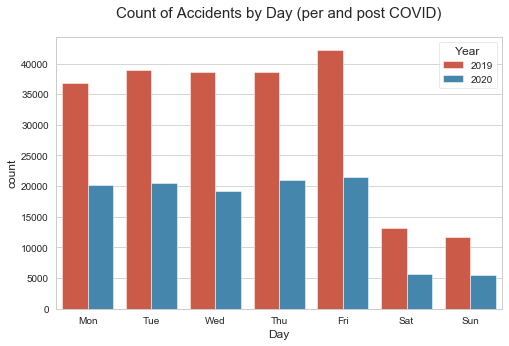

In [52]:
day_lst = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.figure(figsize=(8,5))
chart = sns.countplot(x='Weekday', hue='Year', data=comparison )
plt.xlabel('Day')
plt.title('Count of Accidents by Day (per and post COVID)', size=15, y=1.05)
chart.set(xticks=range(len(day_lst)), xticklabels=[i for i in day_lst])
plt.show()

In [53]:
postcovid = df[(df.Year == 2020)]
print("The overall mean duration post COVID is: ", (round(postcovid['Duration'].mean(),3)), 'min')

The overall mean duration post COVID is:  74.274 min


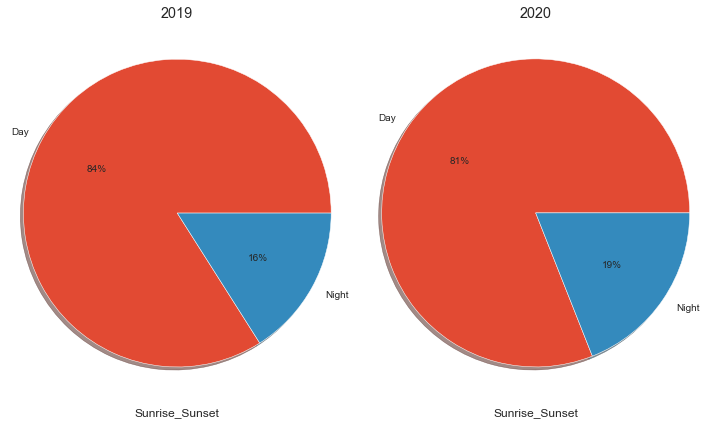

In [54]:
feature='Sunrise_Sunset'

fig= plt.figure(figsize=(15,6))

pct_cutoff=2
def my_autopct(pct):
    return ('%1.0f%%' % pct) if pct > pct_cutoff else ''

for i,yr in enumerate(year):
    plt.subplot(1, 3, 1+i)
    df_temp=comparison[comparison['Year']==yr][feature].value_counts(normalize=True).round(2)

    labels = [n if v > pct_cutoff/100 else ''
              for n, v in zip(df_temp.index, df_temp)] 
    plt.pie(df_temp, labels=labels, autopct=my_autopct, shadow=True)
    plt.axis('equal')
    plt.xlabel(feature)
    plt.title(yr)
    
plt.tight_layout()
plt.show()

## Severity Prediction Modelling<a name="modelling"></a>

#### Import libraries

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
plt.style.use('ggplot')

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import preprocessing
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

#### Load dataset

In [56]:
df = pd.read_hdf(r'C:\Users\ANUSHA\Downloads\US_Accidents_fulldf.csv')
df.head()

,Severity,Start_Time,Start_Lat,Start_Lng,Street,Side,City,County,State,Zipcode,Timezone,Airport_Code,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Duration,Clear,Cloud,Rain,Heavy_Rain,Snow,Heavy_Snow,Fog,Year,Month,Weekday,Day,Hour,Minute,Precipitation_NA
0,3,2016-02-08 05:46:00,39.865147,-84.058723,I-70 E,R,Dayton,Montgomery,OH,45424,US/Eastern,KFFO,36.9,91.0,29.68,10.0,CALM,9.2,0.02,False,False,False,False,False,False,False,False,False,False,False,False,Night,314,0,0,1,0,0,0,0,2016,2,0,39,5,346.0,0
1,2,2016-02-08 06:07:59,39.928059,-82.831184,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US/Eastern,KCMH,37.9,100.0,29.65,10.0,CALM,9.2,0.00,False,False,False,False,False,False,False,False,False,False,False,False,Night,30,0,0,1,0,0,0,0,2016,2,0,39,6,367.0,0
2,2,2016-02-08 06:49:27,39.063148,-84.032608,State Route 32,R,Williamsburg,Clermont,OH,45176,US/Eastern,KI69,36.0,100.0,29.67,10.0,SW,3.5,0.00,False,False,False,False,False,False,False,False,False,False,False,True,Night,30,0,1,0,0,0,0,0,2016,2,0,39,6,409.0,1
3,3,2016-02-08 07:23:34,39.747753,-84.205582,I-75 S,R,Dayton,Montgomery,OH,45417,US/Eastern,KDAY,35.1,96.0,29.64,9.0,SW,4.6,0.00,False,False,False,False,False,False,False,False,False,False,False,False,Night,30,0,1,0,0,0,0,0,2016,2,0,39,7,443.0,1
4,2,2016-02-08 07:39:07,39.627781,-84.188354,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US/Eastern,KMGY,36.0,89.0,29.65,6.0,SW,3.5,0.00,False,False,False,False,False,False,False,False,False,False,False,True,Day,30,0,1,0,0,0,0,0,2016,2,0,39,7,459.0,1


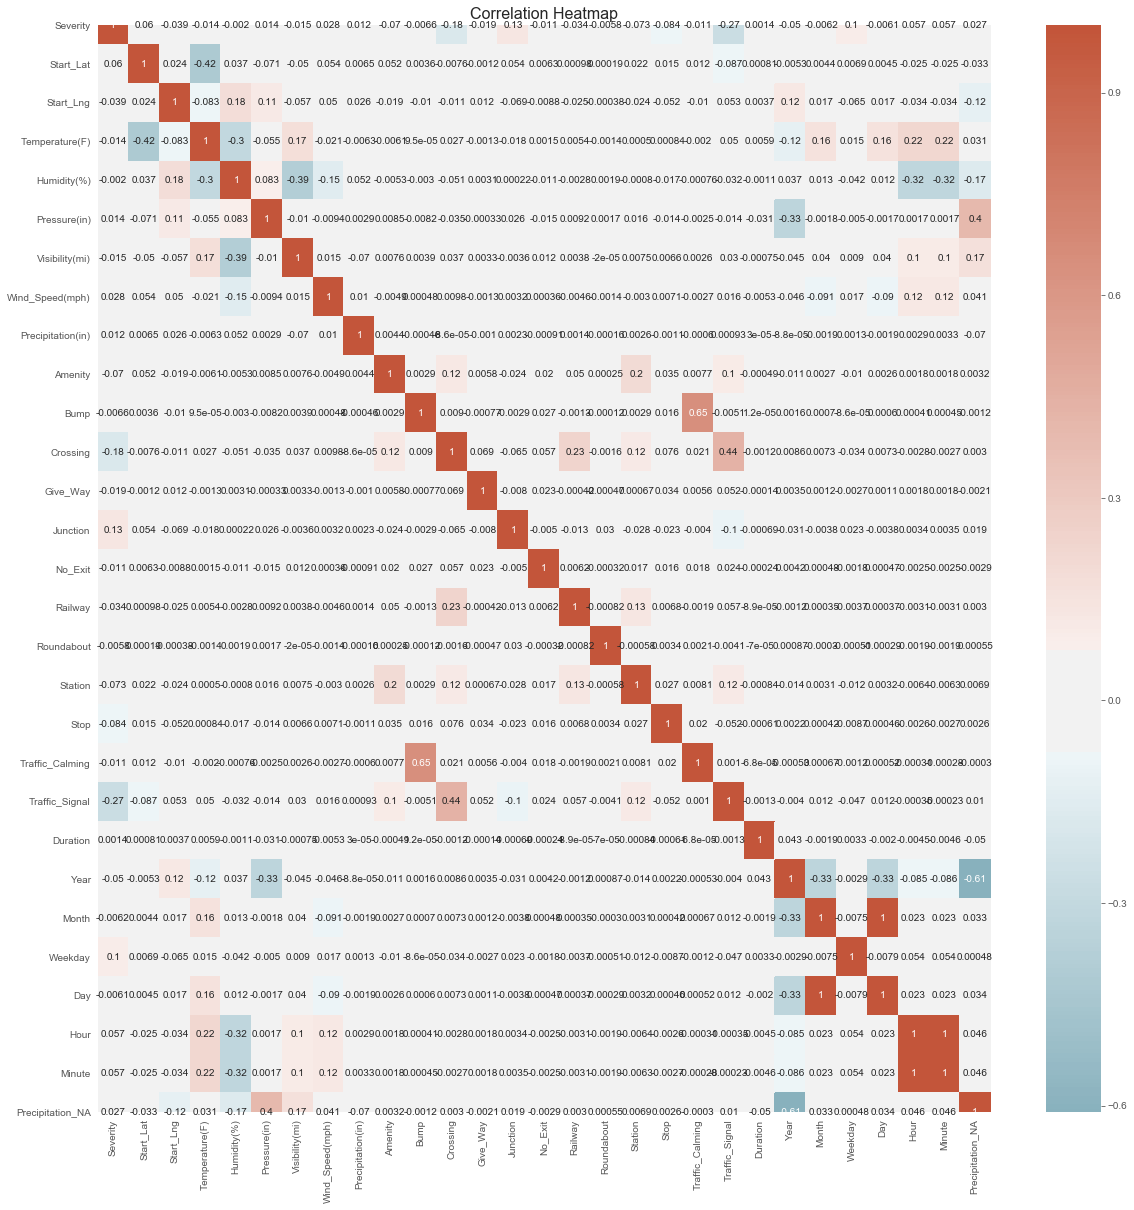

In [57]:
df['Severity'] = df['Severity'].astype(int)
plt.figure(figsize=(20,20))
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
sns.heatmap(df.corr(), annot=True,cmap=cmap, center=0).set_title("Correlation Heatmap", fontsize=16)
plt.show()

Severity does not show strong correlation with any of the feature and hence all the features are used for machine learning model.

The accident dataset is around 3 million and the computational power of my laptop is not enough to build a model on large data. From Exploratory Data Analysis (EDA), the state of California has more accidents compared to other states. Machine learning models are built for Los Angeles, California.

In [58]:
state='CA'
df_state=df.loc[df.State==state].copy()
df_state.drop('State',axis=1, inplace=True)
df_state.shape

(440728, 46)

In [59]:
df_state['City'].value_counts()

Los Angeles                 44916
Sacramento                  16949
San Diego                   13230
San Jose                    11287
Oakland                      7816
                            ...  
Kings Canyon National Pk        1
Hyampom                         1
Elsinore Valley                 1
Sierra                          1
Indian Wells                    1
Name: City, Length: 1085, dtype: int64

In [60]:
city='Los Angeles'

# Select the state of Pennsylvania
df_city=df_state.loc[df_state.City==city].copy()
df_city.drop('City',axis=1, inplace=True)
df_city.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44916 entries, 42866 to 2478814
Data columns (total 45 columns):
Severity             44916 non-null int32
Start_Time           44916 non-null datetime64[ns]
Start_Lat            44916 non-null float64
Start_Lng            44916 non-null float64
Street               44916 non-null object
Side                 44916 non-null object
County               44916 non-null object
Zipcode              44916 non-null object
Timezone             44916 non-null object
Airport_Code         44916 non-null object
Temperature(F)       44916 non-null float64
Humidity(%)          44916 non-null float64
Pressure(in)         44916 non-null float64
Visibility(mi)       44916 non-null float64
Wind_Direction       44916 non-null object
Wind_Speed(mph)      44916 non-null float64
Precipitation(in)    44916 non-null float64
Amenity              44916 non-null bool
Bump                 44916 non-null bool
Crossing             44916 non-null bool
Give_Way        

#### Remove redundant attributes

In [61]:
df_city = df_city.drop(['Start_Time','Day','Minute','Street','County', 'Zipcode', 'Airport_Code','Timezone'],axis=1)
df_city.head()

,Severity,Start_Lat,Start_Lng,Side,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Duration,Clear,Cloud,Rain,Heavy_Rain,Snow,Heavy_Snow,Fog,Year,Month,Weekday,Hour,Precipitation_NA
42866,2,34.078926,-118.289040,R,82.9,47.0,29.95,10.0,VAR,4.6,0.0,False,False,False,False,True,False,False,False,False,False,False,False,Day,40,1,0,0,0,0,0,0,2016,6,1,10,1
42867,3,34.091179,-118.239471,R,82.9,47.0,29.95,10.0,VAR,4.6,0.0,False,False,False,False,False,False,False,False,False,False,False,False,Day,45,1,0,0,0,0,0,0,2016,6,1,10,1
42881,3,34.037239,-118.309074,R,82.9,47.0,29.95,10.0,VAR,4.6,0.0,False,False,False,False,True,False,False,False,False,False,False,False,Day,45,1,0,0,0,0,0,0,2016,6,1,10,1
42883,3,34.027458,-118.274490,R,82.9,47.0,29.95,10.0,VAR,4.6,0.0,False,False,False,False,False,False,False,False,False,False,False,False,Day,38,1,0,0,0,0,0,0,2016,6,1,10,1
42898,3,33.947544,-118.279434,R,80.1,52.0,29.96,10.0,E,9.2,0.0,False,False,False,False,False,False,False,False,False,False,False,False,Day,30,1,0,0,0,0,0,0,2016,6,1,11,1


#### Use one hot encoding technique to conver categorical varables to binary variables

In [62]:
df = df_city
df = df.replace([True, False], [1,0])

cat = ['Side','Wind_Direction','Amenity','Crossing','Junction','Railway', 
       'Station','Traffic_Signal','Stop','Weekday', 'Month', 'Hour',
       'Year','Bump','Give_Way', 'No_Exit','Roundabout','Traffic_Calming','Sunrise_Sunset']
df[cat] = df[cat].astype('category')
df = pd.get_dummies(df, columns=cat, drop_first=True)

We choose records of California to build a model because it has the most number of accidents. Using records for every state won't be possible on a home computer.

In [63]:
df.shape

(44916, 83)

#### Splitting the data into train and test sets

In [64]:
#Set the target for the prediction
target='Severity'

y = df[target] #dependent
X = df.drop(target, axis=1) 

In [65]:
#Data Standardization give data zero mean and unit variance
X = preprocessing.StandardScaler().fit(X).transform(X)

In [66]:
#Split the data set into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

In [67]:
#List of classification algorithms
algo_lst=['Logistic Regression',' K-Nearest Neighbors','Support Vector Machine','Naive Bayes','Decision Trees','Random Forest']

#Initialize an empty list for the accuracy for each algorithm
accuracy_lst=[]

### Logistic Regression

In [68]:
lr = LogisticRegression(random_state=0)
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

acc=accuracy_score(y_test, y_pred)
accuracy_lst.append(acc)

print("[Logistic regression algorithm] accuracy_score: {:.3f}.".format(acc))

C:\Users\ANUSHA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ANUSHA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[Logistic regression algorithm] accuracy_score: 0.703.


### K - Nearest Neighbors

In [69]:
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks): 
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    y_pred=neigh.predict(X_test)
    mean_acc[n-1] = accuracy_score(y_test, y_pred)
    std_acc[n-1]=np.std(y_pred==y_test)/np.sqrt(y_pred.shape[0])
    
mean_acc

array([0.62355298, 0.60407391, 0.6274488 , 0.62099288, 0.63223508,
       0.63078807, 0.63702137, 0.63546305, 0.63646483, 0.64013802,
       0.63913624, 0.63991541, 0.63846839, 0.63880232])

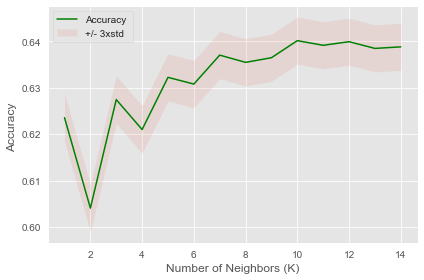

In [70]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [71]:
print( "[K-Nearest Neighbors (KNN)] accuracy_score: ", round(mean_acc.max(),4), "with k=", mean_acc.argmax()+1)

acc=mean_acc.max()
accuracy_lst.append(acc)


[K-Nearest Neighbors (KNN)] accuracy_score:  0.6401 with k= 10


### Support Vector Machines

In [72]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

C:\Users\ANUSHA\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [73]:
y_pred = clf.predict(X_test)

In [74]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

acc = accuracy_score(y_test, y_pred)
accuracy_lst.append(acc)
print("[Support Vector Machine algorithm] accuracy_score: {:.3f}.".format(acc))

[[   0    2    1    0]
 [   0 2579 1619    0]
 [   0  831 3944    0]
 [   0    1    7    0]]
[Support Vector Machine algorithm] accuracy_score: 0.726.


### Naive Bayes

In [75]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [76]:
y_pred = classifier.predict(X_test)

In [77]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

acc = accuracy_score(y_test, y_pred)
accuracy_lst.append(acc)
print("[Naive Bayes algorithm] accuracy_score: {:.3f}.".format(acc))

[[   1    0    0    2]
 [ 750  389  980 2079]
 [ 838   67 1539 2331]
 [   2    0    2    4]]
[Naive Bayes algorithm] accuracy_score: 0.215.


### Decision Tree

In [78]:
#For 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)
dt_entropy.fit(X_train, y_train)

y_pred= dt_entropy.predict(X_test)

accuracy_entropy = accuracy_score(y_test, y_pred)
print('[Decision Tree -- entropy] accuracy_score: {:.3f}.'.format(accuracy_entropy))


#For 'gini' as the information criterion
dt_gini = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=1)
dt_gini.fit(X_train, y_train)

y_pred= dt_gini.predict(X_test)

accuracy_gini = accuracy_score(y_test, y_pred)

acc=accuracy_gini
accuracy_lst.append(acc)

# Print accuracy_gini
print('[Decision Tree -- gini] accuracy_score: {:.3f}.'.format(accuracy_gini))

[Decision Tree -- entropy] accuracy_score: 0.875.
[Decision Tree -- gini] accuracy_score: 0.877.


### Random Forest

In [79]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [80]:
y_pred = classifier.predict(X_test)

In [81]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
acc = accuracy_score(y_test, y_pred)
accuracy_lst.append(acc)
acc

[[   0    3    0    0]
 [   0 3642  556    0]
 [   0  666 4109    0]
 [   0    3    5    0]]


0.8627560106856634

## Results<a name="results"></a>

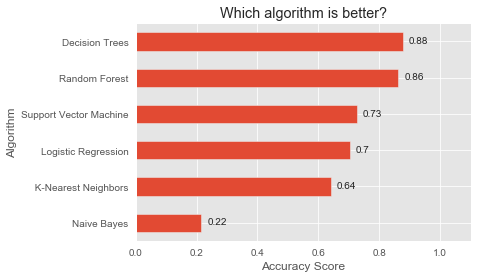

In [82]:
#Make a plot of the accuracy scores for different algorithms


y_ticks=np.arange(len(algo_lst))

#Combine the list of algorithms and list of accuracy scores into a dataframe, sort the value based on accuracy score
df_acc=pd.DataFrame(list(zip(algo_lst, accuracy_lst)), columns=['Algorithm','Accuracy_Score']).sort_values(by=['Accuracy_Score'],ascending = True)

ax=df_acc.plot.barh('Algorithm', 'Accuracy_Score', align='center',legend=False)

for i in ax.patches:
    ax.text(i.get_width()+0.02, i.get_y()+0.2, str(round(i.get_width(),2)), fontsize=10)

plt.xlim(0,1.1)
plt.xlabel('Accuracy Score')
plt.yticks(y_ticks, df_acc['Algorithm'], rotation=0)
plt.title('Which algorithm is better?')

plt.show()

## Conclusion<a name="conclusion"></a>

A large dataset of around 1 GB consists of 3 million accidents is used in this project. To analyze the accidents, the dataset is cleaned systematically and EDA is performed using several iterations.

The computational power of my laptop is not sufficient to build a model on the entire dataset. From Exploratory Data Analysis (EDA), it is observed that the state California has more accidents compared to other states, and Los Angeles had about 45000 accidents in California. Hence machine learning models are developed to predict accident severity for Los Angeles, California.

We find that Decision Trees model with accuracy of 0.88 is best to predict severity of accidents.